In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/titanic.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.shape

(1309, 14)

In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# Data Cleaning

In [7]:
# Analyze Null Data

pd.DataFrame({
     'Columns':df.isna().sum().index,
     'Missing Data':df.isna().sum().values,
     'Percentage':list(map(lambda x: round(x,2),df.isna().sum().values/df.shape[0]*100))
              })

,Columns,Missing Data,Percentage
0,pclass,0,0.00
1,survived,0,0.00
2,name,0,0.00
3,sex,0,0.00
4,age,263,20.09
5,sibsp,0,0.00
6,parch,0,0.00
7,ticket,0,0.00
8,fare,1,0.08
9,cabin,1014,77.46


Cabin , boat , boat , homedest columns are contain massive amount of null data .Now we drop it

In [8]:
df2 = df.drop(['cabin','boat','body','home.dest'],axis=1)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [9]:
# fill Embarked with median value

df2['embarked'].fillna(df2['embarked'].mode()[0],inplace=True)

# fill fare with mean value

df2['fare'].fillna(df2['fare'].mean(),inplace=True)


<ipython-input-9-ad3ad1fb4200>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['embarked'].fillna(df2['embarked'].mode()[0],inplace=True)
<ipython-input-9-ad3ad1fb4200>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [10]:
# for age firstly we identitfy which statistical value give normal distribution
df2['age-mean']= df2['age'].fillna(df2.age.mean())
df2['age=median']= df2['age'].fillna(df2.age.median())
df2['age-mode'] = df2['age'].fillna(df.age.mode()[0])
df2['age-interpolate'] = df2['age'].fillna(df2['age'].interpolate())
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age-mean,age=median,age-mode,age-interpolate
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,29.0000,29.0000,29.0000,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0.9167,0.9167,0.9167,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,2.0000,2.0000,2.0000,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,30.0000,30.0000,30.0000,30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,25.0000,25.0000,25.0000,25.0000


(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <BarContainer object of 10 artists>)

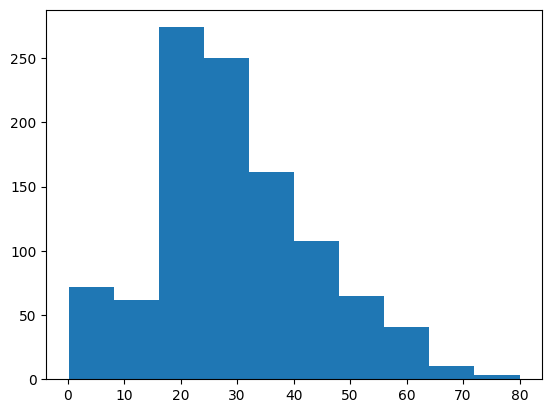

In [11]:
plt.hist(df2['age'])

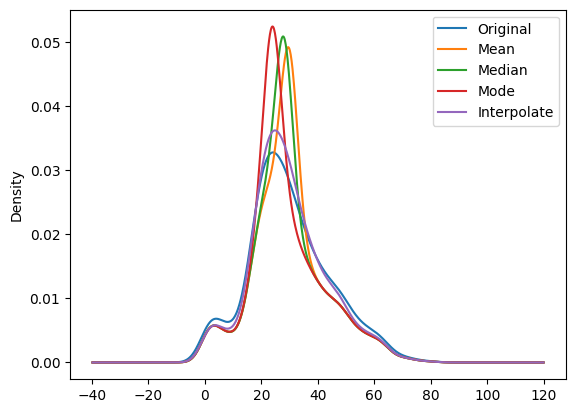

In [12]:
# plot all Age columns
df2['age'].plot(kind='kde',label='Original')
df2['age-mean'].plot(kind ='kde' , label='Mean')
df2['age=median'].plot(kind ='kde' , label='Median')
df2['age-mode'].plot(kind ='kde' , label='Mode')
df2['age-interpolate'].plot(kind = 'kde' , label= 'Interpolate')

plt.legend()
plt.show()

interpolate graph is most normally show .replace age with interpolation

In [13]:
df2['age'] = df2['age-interpolate']


In [14]:
df2.drop(['age-mean','age=median','age-mode','age-interpolate'],axis=1,inplace=True)

In [15]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [16]:
df2.isna().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
embarked,0


Extracting title in names


In [17]:
df2['name']= df2.name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
df2.name.value_counts()

,count
name,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Ms,2


In [19]:
def checker(name):
  if name in ['Mr','Miss','Mrs','Master']:
    return name
  else:
    return 'Rare'

df2['title'] =  df2.name.apply(checker)

In [20]:
# making a single family column
df2['family_size'] = df2.sibsp + df2.parch+1
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size
0,1,1,Miss,female,29.0000,0,0,24160,211.3375,S,Miss,1
1,1,1,Master,male,0.9167,1,2,113781,151.5500,S,Master,4
2,1,0,Miss,female,2.0000,1,2,113781,151.5500,S,Miss,4
3,1,0,Mr,male,30.0000,1,2,113781,151.5500,S,Mr,4
4,1,0,Mrs,female,25.0000,1,2,113781,151.5500,S,Mrs,4


In [21]:
def size_categorize(x):
   if x == 1 :
    return 'Single'
   elif x>1 and x<5:
    return 'Small'
   else:
    return 'large'

df2['family_size'] = df2.family_size.apply(size_categorize)

In [22]:
# df2.family_size.value_counts().corr()

In [23]:
df3 = df2.drop(['name','sibsp','ticket','parch'],axis=1)

In [24]:
df3.head()

,pclass,survived,sex,age,fare,embarked,title,family_size
0,1,1,female,29.0000,211.3375,S,Miss,Single
1,1,1,male,0.9167,151.5500,S,Master,Small
2,1,0,female,2.0000,151.5500,S,Miss,Small
3,1,0,male,30.0000,151.5500,S,Mr,Small
4,1,0,female,25.0000,151.5500,S,Mrs,Small


In [25]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i.lower())
    group_data=df3.groupby(i.lower())['survived'].mean().reset_index()
    print(group_data)
    print('-'*10, '\n')

Survival Correlation by: embarked
  embarked  survived
0        C  0.555556
1        Q  0.357724
2        S  0.334061
---------- 

Survival Correlation by: pclass
   pclass  survived
0       1  0.619195
1       2  0.429603
2       3  0.255289
---------- 

Survival Correlation by: sex
      sex  survived
0  female  0.727468
1    male  0.190985
---------- 

Survival Correlation by: title
    title  survived
0  Master  0.508197
1    Miss  0.676923
2      Mr  0.162483
3     Mrs  0.786802
4    Rare  0.441176
---------- 

Survival Correlation by: family_size
  family_size  survived
0      Single  0.302532
1       Small  0.562929
2       large  0.182927
---------- 



Show Data and graph of pclass vs Survived
survived    0    1
pclass            
1         123  200
2         158  119
3         528  181
---------- 



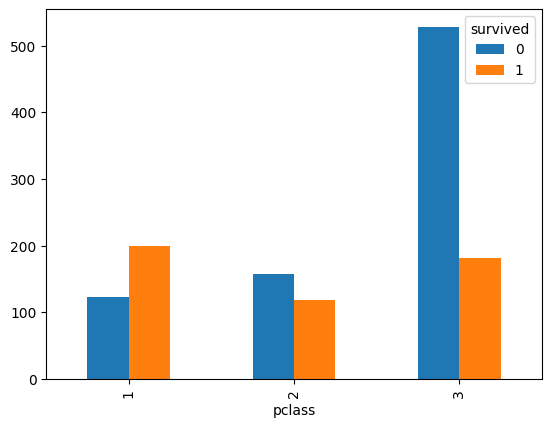

Show Data and graph of sex vs Survived
survived    0    1
sex               
female    127  339
male      682  161
---------- 



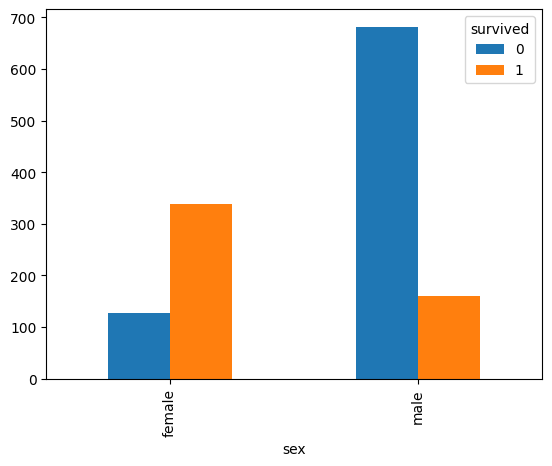

Show Data and graph of title vs Survived
survived    0    1
title             
Master     30   31
Miss       84  176
Mr        634  123
Mrs        42  155
Rare       19   15
---------- 



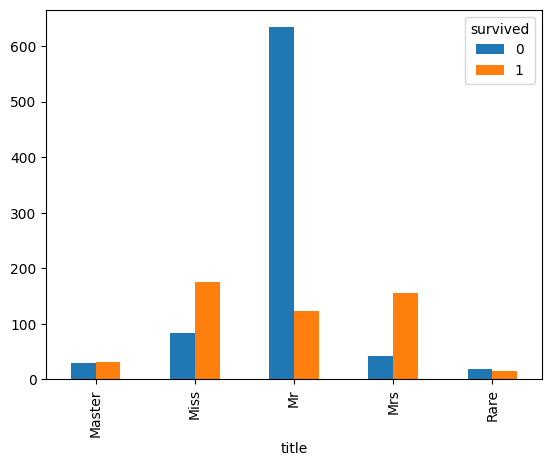

Show Data and graph of family_size vs Survived
survived       0    1
family_size          
Single       551  239
Small        191  246
large         67   15
---------- 



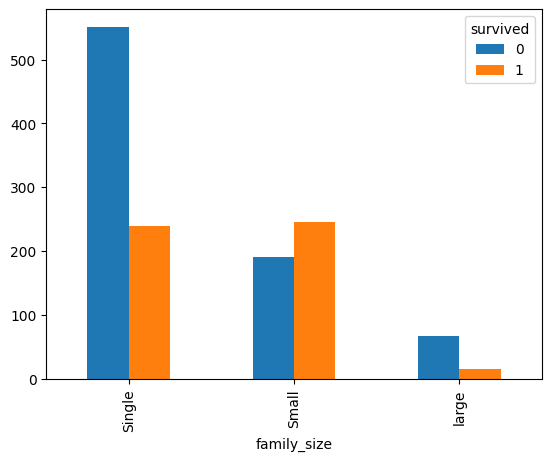

In [26]:
# Visualize rate of Survived with different params
col = ['pclass','sex','title','family_size']
for i in col:
  print(f"Show Data and graph of {i} vs Survived")
  print(df3.groupby([f'{i}','survived']).size().unstack())
  print('-'*10, '\n')
  df3.groupby([f'{i}','survived']).size().unstack().plot(kind='bar')
  # sns.countplot(x=i,hue='survived',data=df3)
  # sns.barplot(x=i,y='survived',data=df3)
  plt.show()




In [27]:
df3.age = df3.age.apply(lambda x: int(round(x)))

In [28]:
df3.head()

,pclass,survived,sex,age,fare,embarked,title,family_size
0,1,1,female,29,211.3375,S,Miss,Single
1,1,1,male,1,151.5500,S,Master,Small
2,1,0,female,2,151.5500,S,Miss,Small
3,1,0,male,30,151.5500,S,Mr,Small
4,1,0,female,25,151.5500,S,Mrs,Small


# **Data Preprocessing**

In [29]:
# Preprocessing
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,ShuffleSplit

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Making pipelines
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer


# Making Matrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report






In [30]:
# Split data into X and Y
X = df3.drop('survived',axis=1)
y = df3.survived

In [31]:
# Make column transformer
ct = ColumnTransformer([
['Scaling',StandardScaler(),['age','fare']],
['orderScaled',OrdinalEncoder(),['pclass','family_size']],
['ohe',OneHotEncoder(drop='first'),['sex','title','embarked']],
],remainder='passthrough')


In [32]:
# let transform
X_transform = ct.fit_transform(X)

# **Hyper parameter tuning**

In [33]:
def my_best_model(x, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'fit_intercept': [True, False],
                'C': [0.1, 1, 10],
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'Decision_Tree_Classifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 10, 20]
            }
        },
        'GaussianNB': {
            'model': GaussianNB(),
            'params': {
                'priors': [None]
            }
        },
        'Random_Forest_Classifier': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [ 200, 300],
                'max_depth': [10, 20],
                'min_samples_split': [2, 10]
            }
        },
        'Support_Vector_Classification': {
            'model': SVC(),
            'params': {
                'gamma': ['scale', 'auto'],
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [34]:
model_report = my_best_model(X_transform,y)


In [35]:
model_report

,model,best_score,best_params
0,logistic_regression,0.808397,"{'C': 0.1, 'fit_intercept': True, 'solver': 'l..."
1,Decision_Tree_Classifier,0.806870,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
2,GaussianNB,0.768702,{'priors': None}
3,Random_Forest_Classifier,0.819084,"{'max_depth': 20, 'min_samples_split': 10, 'n_..."
4,Support_Vector_Classification,0.809924,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"
5,KNN,0.795420,"{'algorithm': 'brute', 'n_neighbors': 7, 'weig..."


# **Model Evaluation :**

We use Top 3 model that perform best scores


In [36]:
# Making train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train

,pclass,sex,age,fare,embarked,title,family_size
772,3,male,17,7.8958,S,Mr,Single
543,2,male,36,10.5000,S,Mr,Single
289,1,female,18,79.6500,S,Miss,Small
10,1,male,47,227.5250,C,Rare,Small
147,1,male,47,42.4000,S,Mr,Single
...,...,...,...,...,...,...,...
1095,3,female,16,7.6292,Q,Miss,Single
1130,3,female,18,7.7750,S,Miss,Single
1294,3,male,28,16.1000,S,Mr,Single
860,3,female,26,7.9250,S,Miss,Single


In [38]:
X_train_transform = ct.fit_transform(X_train)
X_test_transform = ct.transform(X_test)


In [40]:
df3.fare.describe()

,fare
count,1309.000000
mean,33.295479
std,51.738879
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [41]:
X_train_transform.shape,X_test_transform.shape

((1047, 11), (262, 11))

In [42]:
X_test_transform[0]

array([ 0.41048924, -0.51046861,  2.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [43]:
# Define models with best params
LR_model = LogisticRegression(C=0.1, fit_intercept=True, solver='lbfgs')
RFC_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=300)
SVC_model = SVC(C=1, gamma='auto', kernel='rbf')

In [44]:
LR_model.fit(X_train_transform,y_train)
RFC_model.fit(X_train_transform,y_train)
SVC_model.fit(X_train_transform,y_train)

SVC(C=1, gamma='auto')

In [45]:
LR_pred = LR_model.predict(X_test_transform)
RFC_pred = RFC_model.predict(X_test_transform)
SVC_pred = SVC_model.predict(X_test_transform)

In [46]:
# calculate accuracy of all models
LR_accuracy = accuracy_score(y_test,LR_pred)
RFC_accuracy = accuracy_score(y_test,RFC_pred)
SVC_accuracy = accuracy_score(y_test,SVC_pred)

In [47]:
print(f"Logistic Regression Accuracy : {LR_accuracy}")
print(f"Random Forest Classifier Accuracy : {RFC_accuracy}")
print(f"Support Vector Classification Accuracy : {SVC_accuracy}")

Logistic Regression Accuracy : 0.7862595419847328
Random Forest Classifier Accuracy : 0.7824427480916031
Support Vector Classification Accuracy : 0.7862595419847328


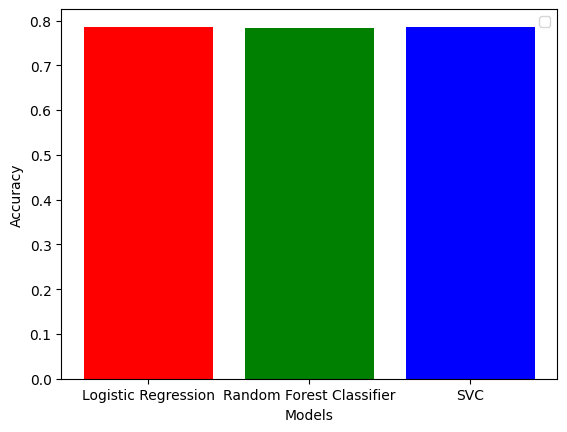

In [48]:
plt.bar(['Logistic Regression','Random Forest Classifier','SVC'],[LR_accuracy,RFC_accuracy,SVC_accuracy],color=['red','green','blue'],)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Prediction**
Now model is able to predict about survival or not by user input data

In [ ]:
# Use random data  to check the predictions of models

df3.sample(5)

,pclass,survived,sex,age,fare,embarked,title,family_size
101,1,0,male,39,29.7000,C,Mr,Single
785,3,1,female,22,13.9000,S,Mrs,Small
261,1,1,male,35,26.2875,S,Mr,Single
719,3,1,male,18,8.0500,S,Mr,Single
907,3,0,female,20,9.8250,S,Miss,Small


In [57]:
def  pred_user_input_data(x):
    data = {
    'pclass': [x[0]],
    'sex': [x[1]],
    'age': [x[2]],
    'fare': [x[3]],
    'embarked': [x[4]],
    'title':[x[5]],
    'family_size':[x[6]]
      }
    output_LR = LR_model.predict( ct.transform(pd.DataFrame(data)))
    output_RFC = RFC_model.predict( ct.transform(pd.DataFrame(data)))
    output_SVC = SVC_model.predict( ct.transform(pd.DataFrame(data)))
    output = {"LR model output":output_LR[0],
              "RFC model output":output_RFC[0],
              "SVC model output":output_SVC[0]
              }
    return output  # here output store in array,So we return  array index of 0 value



{'LR model output': 0, 'RFC model output': 0, 'SVC model output': 0}

In [60]:
# --> Now predict sample data one by one

#  Predict data of index 101
print(pred_user_input_data([3,'male',2,39.6875,'S','Master','large']))

#  Predict data of index 785
print(pred_user_input_data([3,'female',22,13.9000,'S','Mrs','Small']))

#  Predict data of index 261
print(pred_user_input_data([1,'male',	35,26.2875,'S','Mr','Single']))

#  Predict data of index 719 ,
print(pred_user_input_data([3,'male',	18,	8.0500,'S',	'Mr',	'Single']))


#  Predict data of index 907
print(pred_user_input_data([3,'female',	20,9.8250	,'S','Miss','Small']))

{'LR model output': 0, 'RFC model output': 0, 'SVC model output': 0}
{'LR model output': 1, 'RFC model output': 0, 'SVC model output': 1}
{'LR model output': 0, 'RFC model output': 1, 'SVC model output': 0}
{'LR model output': 0, 'RFC model output': 0, 'SVC model output': 0}
{'LR model output': 0, 'RFC model output': 0, 'SVC model output': 1}


In [58]:
df3.sample(5)

,pclass,survived,sex,age,fare,embarked,title,family_size
101,1,0,male,39,29.7000,C,Mr,Single
785,3,1,female,22,13.9000,S,Mrs,Small
261,1,1,male,35,26.2875,S,Mr,Single
719,3,1,male,18,8.0500,S,Mr,Single
907,3,0,female,20,9.8250,S,Miss,Small
